In [1]:
import pandas as pd
import numpy as np

friends = pd.read_csv('friends_text_ratings.csv', index_col=0)
friends.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,text,len in words,len_prep
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,tell guy work going guy got wrong nice hump hu...,16424.0,5280.0
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,guys understand kissing important need know ki...,10709.0,3170.0
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,hi guys good walked subway said ouch said good...,12313.0,3689.0
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,omnipotent day want world peace hunger good th...,12290.0,4041.0
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,let big deal big deal amazing reach little man...,12660.0,3859.0


In [2]:
np.mean(friends['len_prep'])

4027.135593220339

## Some checks

In [3]:
# 5 least popular Friends episodes

check = friends.sort_values(by='Stars')

for i in range(5):
    row = check.iloc[i]
    episode = row['Episode Number']
    name = row['Episode_Title']
    season = row['Season']
    summary = row['Summary']
    stars = row['Stars']
    print(f'season {season} episode {episode} , "{name}" rating = {stars} stars: \n\n {summary}\n')

season 4 episode 21 , "The One with the Invitation" rating = 7.2 stars: 

 As Ross and Emily send out wedding invitations, he and Rachel each look back on their relationship together while Joey and Chandler look for a purpose in life.

season 6 episode 20 , "The One with Mac and C.H.E.E.S.E." rating = 7.4 stars: 

 Chandler forgets to write down a message for Joey when the time of his audition for the lead in a TV show is changed.

season 8 episode 19 , "The One with Joey's Interview" rating = 7.5 stars: 

 Joey prepares for his epic interview with Soap Opera Digest, reminiscing about his past acting experiences, his friends and his romantic life.

season 7 episode 21 , "The One with the Vows" rating = 7.5 stars: 

 Monica and Chandler are getting married in four weeks and have to write their vows, but neither has a clue what to say, so they reflect on their past.

season 9 episode 10 , "The One with Christmas in Tulsa" rating = 7.5 stars: 

 Chandler must spend Christmas in Tulsa, whi

In [4]:
# 5 most popular Friends episodes

check = friends.sort_values(by='Stars', ascending=False)

for i in range(5):
    row = check.iloc[i]
    episode = row['Episode Number']
    name = row['Episode_Title']
    season = row['Season']
    summary = row['Summary']
    stars = row['Stars']
    print(f'season {season} episode {episode} , "{name}" rating = {stars} stars: \n\n {summary}\n')

season 10 episode 18 , "The Last One: Part 2" rating = 9.7 stars: 

 Phoebe races Ross to the airport in a bid to stop Rachel from leaving for Paris. Monica and Chandler pack up their apartment ahead of their move to their new house, and Joey buys Chandler a new chick and duck as a leaving present.

season 5 episode 14 , "The One Where Everybody Finds Out" rating = 9.7 stars: 

 When Phoebe finds out about Monica and Chandler, she and Rachel attempt to get them to confess their relationship.

season 10 episode 17 , "The Last One: Part 1" rating = 9.5 stars: 

 Erica gives birth to the baby that Monica and Chandler are adopting. However, there's one small added surprise. Meanwhile, Ross and Rachel sleep together one last time before Rachel leaves ...                See full summary »

season 4 episode 12 , "The One with the Embryos" rating = 9.5 stars: 

 Phoebe's uterus is examined for implantation of the embryos. Meanwhile, a seemingly harmless game between Chandler and Joey against M

### topic model with cornell corpus

In [5]:
import glob
import random
RND = 12345
random.seed(RND)

In [7]:
cornell = pd.read_csv('new_cornell.csv', index_col=0)

In [8]:
n_features = 5000 # number of most common words
n_topics = 30 # number of topics
n_top_words = 60 # number of characteristic words per topic (viz purposes only)
max_df = 0.5 # maximum document frequency
min_df = 100 # minimum document frequency

In [10]:
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def identity(x):
    return x

chunks = [value.split() for value in cornell.text.values]

vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df,
                             max_features=n_features,
                             analyzer=identity)
X = vectorizer.fit_transform(chunks)

from sklearn.decomposition import NMF
nmf = NMF(n_components=100,
          random_state=RND,
          verbose=1, max_iter=50).fit(X) # fit NMF model with TF-IDF features

violation: 1.0
violation: 0.0865769346380437
violation: 0.07792907721039505
violation: 0.06395166094473317
violation: 0.0560020869028855
violation: 0.05114480040988376
violation: 0.046763338164021076
violation: 0.04295760189926469
violation: 0.039457907904814474
violation: 0.036700553389472486
violation: 0.03399458316140162
violation: 0.031526533092968066
violation: 0.029119652751073557
violation: 0.026154367631076512
violation: 0.02260024677931986
violation: 0.019453199421395586
violation: 0.01696505007091021
violation: 0.015206544607666524
violation: 0.013648147834059361
violation: 0.012380284890431841
violation: 0.011367640132819327
violation: 0.010556079809728749
violation: 0.010119026770787336
violation: 0.009891191061264414
violation: 0.009842978626947982
violation: 0.009821591332704148
violation: 0.009765639562494767
violation: 0.009656611351464204
violation: 0.009365461458996539
violation: 0.00888732823758722
violation: 0.008374904243350289
violation: 0.007911930709436119
viola

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 50 reached. Increase it to improve convergence.
  warnings.warn(


In [11]:
for topic_idx, topic in enumerate(nmf.components_[:10]):
    top_idxs = np.argsort(topic)[::-1][:10]
    top_words = np.array(vectorizer.get_feature_names())[top_idxs]
    print(f'topic {topic_idx}:', ' - '.join(top_words))

topic 0: fuck - fucked - bitch - stupid - bullshit - asshole - ass - cops - calm - weird
topic 1: fucking - fuck - drugs - fucked - asshole - nuts - driving - worse - sitting - tree
topic 2: ai - folks - boss - boys - beat - bet - mess - road - rules - horse
topic 3: ship - space - control - board - light - lock - blow - jump - officer - luck
topic 4: mom - dinner - dad - entire - state - visit - meeting - red - eating - number
topic 5: child - doctor - horse - losing - speak - brought - learn - pain - angry - act
topic 6: married - marry - marriage - women - bed - month - lady - write - dying - fish
topic 7: war - letter - attack - country - officer - orders - peace - cause - bigger - american
topic 8: movie - movies - picture - clothes - girlfriend - perfect - press - stupid - credit - acting
topic 9: police - station - safe - drive - hiding - murder - afternoon - bag - body - trick


c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# chunks = Chunker(filenames, meta,
#                  singles_only=True,
#                  chunk_size=chunk_size,
#                  max_chars_per_book=None)
# X = vectorizer.transform(chunks)
# X = transformer.transform(X)
print(X.shape)

(617, 711)


In [13]:
nmf.verbose = 1
X_ = nmf.transform(X)
print(X_.shape)

violation: 1.0
violation: 0.3979461536505132
violation: 0.15277404803126013
violation: 0.044026537900831164
violation: 0.013808524788156702
violation: 0.006999734183568756
violation: 0.002420190798483533
violation: 0.0010142283845107451
violation: 0.0005159252249431884
violation: 0.00020215377085230877
violation: 8.777382834624925e-05
Converged at iteration 12
(617, 100)


In [14]:
from sklearn.feature_selection import f_classif

genres = cornell.columns[8:]
feature_names = vectorizer.get_feature_names()

for genre in genres:
    print(f'-> genre {genre}:')
    y = cornell[genre]
    # univariate feature selection with F-test for feature scoring
    F, pval = f_classif(X_, y)
    
    # indices of three best topics
    for topic_idx in np.argsort(F)[::-1][:3]:
        topic = np.nan_to_num(nmf.components_[topic_idx])
        words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
        print('   ' + ' - '.join(words))

-> genre biography:
   speak - forgive - moment - pleasure - evening - accept - possible - fear - peace
   fight - honor - fighting - peace - win - swear - beg - answer - food
   country - government - press - american - boss - fired - secret - state - public
-> genre family:
   fly - nose - idiot - moving - present - fault - quit - worried - quiet
   dear - poor - wonderful - bet - letter - promised - bed - brains - suppose
   power - reach - seconds - strong - destroy - earth - return - form - follow
-> genre comedy:
   class - college - cool - special - date - fun - high - amazing - stupid
   sex - women - date - asking - quit - felt - relationship - likes - bathroom
   married - marry - marriage - women - bed - month - lady - write - dying
-> genre sci-fi:
   ship - space - control - board - light - lock - blow - jump - officer
   human - memory - body - save - nature - destroy - purpose - experience - fear
   power - reach - seconds - strong - destroy - earth - return - form - fol

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
import pandas as pd
nmf.verbose = 0

texts = [value.split() for value in friends.text.values]

scores = nmf.transform(vectorizer.transform(texts))  # transform the HP chapters according to the fitted NMF model
scores.shape
# print(scores)

(236, 100)

In [16]:
df_scores = pd.DataFrame(scores, columns=[f't{i+1}' for i in range(scores.shape[1])])
friends2 = friends.join(df_scores)
friends2.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,...,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,...,0.021190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025765,0.026101,0.0
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,...,0.255251,0.000000,0.000000,0.000000,0.001491,0.000000,0.000000,0.000000,0.000000,0.0
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,...,0.003879,0.063990,0.033404,0.000000,0.000000,0.001205,0.004744,0.086703,0.000000,0.0
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,...,0.016969,0.124187,0.000000,0.042591,0.000000,0.000000,0.004826,0.033612,0.015679,0.0
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036513,0.000000,0.002174,0.0


In [17]:
from operator import itemgetter
from scipy.stats import kendalltau

ranks = range(1, len(friends2.index)+1)
tau_scores = []
for col in [f't{i+1}' for i in range(scores.shape[1])]:
    tau, p = kendalltau(ranks, friends2[col].tolist())
    tau_scores.append((col, tau))
    
tau_scores.sort(key=itemgetter(1))
nb = 6
top, bottom = tau_scores[:nb], tau_scores[-nb:]
print(tau_scores[:10]) # print 10 topics with lowest Tau score

[('t45', -0.11675038091231792), ('t62', -0.1082464070343578), ('t92', -0.10729190120257964), ('t13', -0.10660060397195671), ('t46', -0.10305600223671801), ('t41', -0.09580624609572665), ('t34', -0.09072799910536943), ('t87', -0.08983561919836142), ('t61', -0.08880461362807564), ('t19', -0.07454605148011899)]


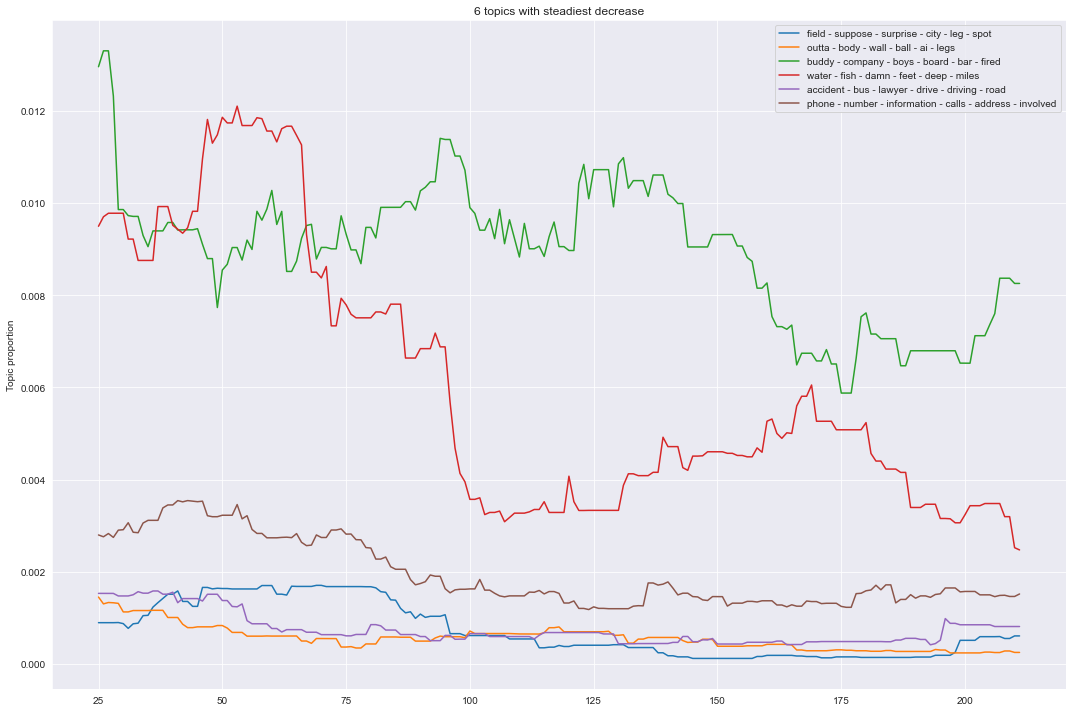

In [18]:
import matplotlib.pyplot as plt

import seaborn as sb
feature_names = vectorizer.get_feature_names_out()
fig = plt.figure(figsize=(15, 10))
sb.set_style("darkgrid")
for (feat, tau), col in zip(top, sb.color_palette("Set1")[:nb]):
    topic = nmf.components_[int(feat.replace('t', '')) - 1, :]
    words = [feature_names[i] for i in topic.argsort()[:-6-1:-1]]
    label = ' - '.join(words)
    friends2[feat].rolling(window=50, center=True).mean().plot(label=label)
plt.xlabel('', fontsize=10)
plt.ylabel('Topic proportion', fontsize=10)
plt.title(f'{nb} topics with steadiest decrease')
plt.tight_layout()
plt.legend();

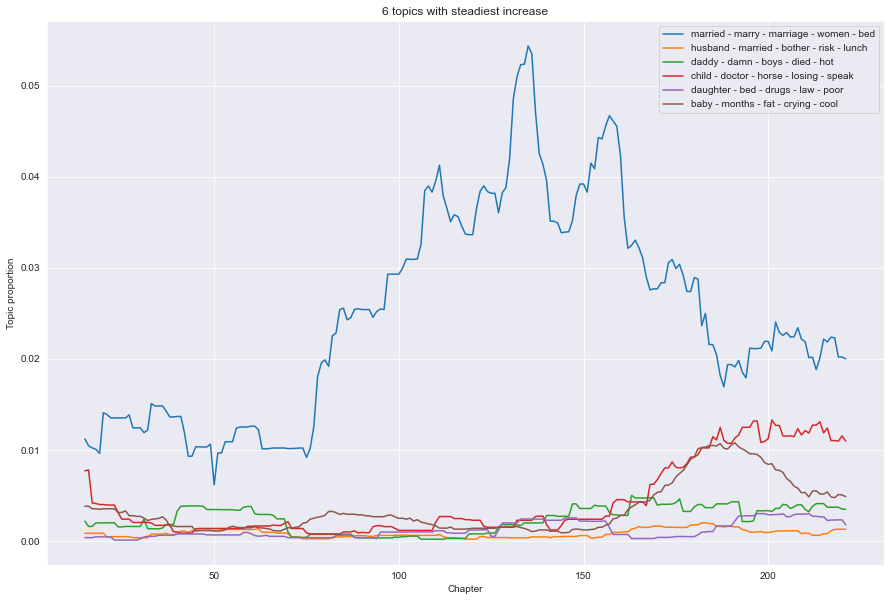

In [19]:
fig = plt.figure(figsize=(15, 10))
sb.set_style("darkgrid")
for (feat, tau), col in zip(bottom, sb.color_palette("Set1")[:nb]):
    topic = nmf.components_[int(feat.replace('t', '')) - 1, :]
    words = [feature_names[i] for i in topic.argsort()[:-5-1:-1]]
    label = ' - '.join(words)
    friends2[feat].rolling(window=30, center=True).mean().plot(label=label)
plt.xlabel('Chapter', fontsize=10)
plt.ylabel('Topic proportion', fontsize=10)
plt.title(f'{nb} topics with steadiest increase')
plt.legend();

In [20]:
#25 most predictive topics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

feature_names = vectorizer.get_feature_names_out()
X = friends2.drop(columns=friends.columns.tolist())


y = friends2.Stars
# univariate feature selection with F-test for feature scoring
F, pval = f_regression(X, y)
    
# indices of three best topics
for topic_idx in np.argsort(F)[::-1][:25]:
    topic = np.nan_to_num(nmf.components_[topic_idx])
    words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
    print(f't{topic_idx}: ' + ' - '.join(words))

t16: plane - control - fly - saved - meant - miles - sell - country - broke
t77: write - writing - wrote - paper - office - letter - copy - stories - finished
t98: summer - lived - grow - ride - interesting - sounds - choice - learned - allowed
t53: dear - poor - wonderful - bet - letter - promised - bed - brains - suppose
t72: tape - records - questions - bitch - answer - news - record - acting - dinner
t91: buddy - company - boys - board - bar - fired - bet - bucks - quit
t95: fire - fired - company - women - future - station - learn - fault - wind
t59: kids - company - office - sick - bet - scared - swear - upset - lunch
t63: store - paper - date - miles - closed - nuts - major - record - girlfriend
t13: game - games - ball - playing - beat - played - rules - win - starting
t73: died - future - building - murder - simple - lives - fear - looked - doubt
t28: feet - percent - ones - action - watching - gives - evidence - bunch - heavy
t32: power - reach - seconds - strong - destroy - 

## setting baseline

In [21]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = friends2.drop(columns=friends.columns.tolist())
y = friends2.Stars

dummy_regr = DummyRegressor(strategy="mean")

scores = cross_val_score(dummy_regr, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores))


-0.3946868469935892


In [22]:
#all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

feature_names = vectorizer.get_feature_names_out()
X = friends2.drop(columns=friends.columns.tolist())
y = friends2.Stars

reg = LinearRegression()

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores))

-0.553959745981242


In [23]:
#25 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]

feature_names = vectorizer.get_feature_names_out()
Xble = friends2.drop(columns=friends.columns.tolist())
X = Xble[Best]
y = friends2.Stars

reg = LinearRegression()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores))

-0.44598168497481694


In [24]:
#10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]

feature_names = vectorizer.get_feature_names_out()
Xble = friends2.drop(columns=friends.columns.tolist())
X = Xble[Best]
y = friends2.Stars

reg = LinearRegression()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores))

-0.42294482248333687


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:5]]

feature_names = vectorizer.get_feature_names_out()
Xble = friends2.drop(columns=friends.columns.tolist())
X = Xble[Best]
y = friends2.Stars

reg = LinearRegression()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores))

-0.4211925448112308


In [26]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Votes', 'Duration']

cols = Best+xtra

cols.append('Stars')

scal = StandardScaler()

corrM = friends2[cols].corr()
 
corrM


,t16,t77,t98,t53,t72,t91,t95,t59,t63,t13,Year_of_prod,Votes,Duration,Stars
t16,1.000000,-0.155331,-0.023623,0.013279,0.027142,-0.006744,-0.047246,-0.022872,-0.027721,-0.023701,0.025320,0.032379,0.018408,-0.031779
t77,-0.155331,1.000000,-0.031306,-0.051102,-0.012457,0.022852,-0.008759,-0.011463,-0.059075,-0.012116,-0.071712,0.027977,-0.027388,0.016262
t98,-0.023623,-0.031306,1.000000,-0.048435,-0.039380,-0.095903,0.037307,0.081308,-0.034310,-0.068568,-0.057470,-0.003762,-0.027574,-0.031372
t53,0.013279,-0.051102,-0.048435,1.000000,-0.034694,-0.022823,-0.032186,0.000974,0.004057,-0.039111,0.007341,-0.014512,-0.011713,0.011641
t72,0.027142,-0.012457,-0.039380,-0.034694,1.000000,-0.052449,0.050898,-0.033272,-0.038497,0.061979,-0.086063,-0.015093,-0.058817,0.007527
t91,-0.006744,0.022852,-0.095903,-0.022823,-0.052449,1.000000,-0.039594,0.007192,-0.063456,0.004223,0.004598,-0.024447,0.086421,0.023648
t95,-0.047246,-0.008759,0.037307,-0.032186,0.050898,-0.039594,1.000000,-0.066174,-0.047349,-0.068635,-0.004222,-0.012658,-0.051500,0.006658
t59,-0.022872,-0.011463,0.081308,0.000974,-0.033272,0.007192,-0.066174,1.000000,-0.003928,-0.043595,-0.006270,-0.067639,-0.029609,0.018905
t63,-0.027721,-0.059075,-0.034310,0.004057,-0.038497,-0.063456,-0.047349,-0.003928,1.000000,0.118076,-0.029322,-0.012237,-0.026103,-0.034532
t13,-0.023701,-0.012116,-0.068568,-0.039111,0.061979,0.004223,-0.068635,-0.043595,0.118076,1.000000,-0.166620,-0.034223,0.062916,-0.064706


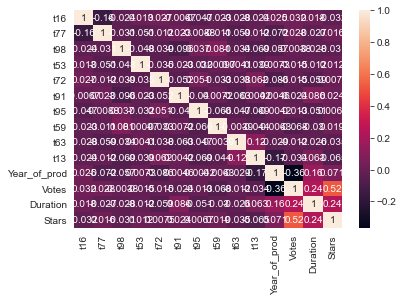

In [27]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrM, annot=True)
plt.show()

In [28]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Votes', 'Duration']

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = LinearRegression()
scal = StandardScaler()

pipe = make_pipeline(scal,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores))

-0.4506329003806716


In [29]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Duration']

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = LinearRegression()
scal = StandardScaler()

pipe = make_pipeline(scal,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores))

-0.43560461934372424


In [ ]:
xtra = ['Year_of_prod', 'Director', 'Votes', 'Duration']
test
from sklearn.compose import ColumnTransformer

In [30]:
import joblib
filename = 'nmf_cornell_friends.sav'
joblib.dump(nmf, filename)

['nmf_cornell_friends.sav']

In [143]:
loaded_model.get_feature_names_out()

array(['nmf0', 'nmf1', 'nmf2', 'nmf3', 'nmf4', 'nmf5', 'nmf6', 'nmf7',
       'nmf8', 'nmf9', 'nmf10', 'nmf11', 'nmf12', 'nmf13', 'nmf14',
       'nmf15', 'nmf16', 'nmf17', 'nmf18', 'nmf19', 'nmf20', 'nmf21',
       'nmf22', 'nmf23', 'nmf24', 'nmf25', 'nmf26', 'nmf27', 'nmf28',
       'nmf29', 'nmf30', 'nmf31', 'nmf32', 'nmf33', 'nmf34', 'nmf35',
       'nmf36', 'nmf37', 'nmf38', 'nmf39', 'nmf40', 'nmf41', 'nmf42',
       'nmf43', 'nmf44', 'nmf45', 'nmf46', 'nmf47', 'nmf48', 'nmf49',
       'nmf50', 'nmf51', 'nmf52', 'nmf53', 'nmf54', 'nmf55', 'nmf56',
       'nmf57', 'nmf58', 'nmf59', 'nmf60', 'nmf61', 'nmf62', 'nmf63',
       'nmf64', 'nmf65', 'nmf66', 'nmf67', 'nmf68', 'nmf69', 'nmf70',
       'nmf71', 'nmf72', 'nmf73', 'nmf74', 'nmf75', 'nmf76', 'nmf77',
       'nmf78', 'nmf79', 'nmf80', 'nmf81', 'nmf82', 'nmf83', 'nmf84',
       'nmf85', 'nmf86', 'nmf87', 'nmf88', 'nmf89', 'nmf90', 'nmf91',
       'nmf92', 'nmf93', 'nmf94', 'nmf95', 'nmf96', 'nmf97', 'nmf98',
       'nmf99', 'nmf1

In [18]:
friends2 = pd.read_csv(folder + 'friends_episodes_v3.csv')
friends2.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438


In [19]:
friends2.tail()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
231,2004,10,14,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989
232,2004,10,15,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771
233,2004,10,16,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141
234,2004,10,17,The Last One: Part 1,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221
235,2004,10,18,The Last One: Part 2,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


### ignore

In [48]:
# from nrclex import NRCLex

In [49]:
# import nltk
# # nltk.download('stopwords')
# from nltk.corpus import stopwords
# import string
# import re
# import spacy
# nlp = spacy.load("en_core_web_sm")

# def prep_for_nrclex(txt):
#     txt = txt.translate(str.maketrans(' ', ' ', string.punctuation))  
#     stops = set(stopwords.words("english"))
#     txt = [token.lemma_ for token in nlp(txt) if not token in stops and len(token) >= 3]
#     txt = " ".join(txt)
#     return txt

# friends['tokenized'] = friends['line'].apply(prep_for_nrclex)

c:\Users\Gebruiker\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [6]:
import pandas as pd
# friends.to_csv('friends.tsv', sep='\t')
friends = pd.read_csv('friends.tsv', sep='\t', index_col=0)
friends.head()

,id,season,episode,episode_name,character,line,tokenized
0,S01E01,S01,1.0,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I...,there nothing tell just some guy work with
1,S01E01,S01,1.0,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's...",Cmon you go out with the guy there get somethi...
2,S01E01,S01,1.0,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a h...",all right Joey nice do have hump hump and hair...
3,S01E01,S01,1.0,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?\n",wait do eat chalk
4,S01E01,S01,1.0,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through ...",just cause want she through what go through wi...


In [11]:
from sklearn.feature_extraction import DictVectorizer
dictvect = DictVectorizer(sparse=False)

from nrclex import NRCLex
lines = [str(value) for value in friends.tokenized.values]
d = [NRCLex(line).raw_emotion_scores for line in lines]
lex_matrix = dictvect.fit_transform(d)
lex_matrix.shape
lex_frame = pd.DataFrame(lex_matrix, columns = dictvect.get_feature_names())
lex_frame.head()
lex_frame.describe()

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
count,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000
mean,0.127398,0.285190,0.094273,0.160352,0.265035,0.313827,0.438375,0.157400,0.191617,0.251451
std,0.407875,0.632903,0.353236,0.457183,0.619065,0.677608,0.826893,0.452153,0.491875,0.592975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,15.000000,9.000000,14.000000,9.000000,11.000000,15.000000,16.000000,13.000000,8.000000,10.000000


In [12]:
friends = friends.join(lex_frame)

In [13]:
groups = friends.groupby('id')

lex = lex_frame.columns

bigdct = {}

for groupname in groups.groups:
    group = groups.get_group(groupname)
    print(group.head())
    dct = {}
    for sent in lex: 
        episode_sent = group[sent].sum()/len(group)
        dct[sent] = episode_sent
    bigdct[groupname] = dct



       id season  episode            episode_name character  \
0  S01E01    S01      1.0  Monica Gets A Roommate    Monica   
1  S01E01    S01      1.0  Monica Gets A Roommate      Joey   
2  S01E01    S01      1.0  Monica Gets A Roommate  Chandler   
3  S01E01    S01      1.0  Monica Gets A Roommate    Phoebe   
4  S01E01    S01      1.0  Monica Gets A Roommate    Phoebe   

                                                line  \
0   There's nothing to tell! He's just some guy I...   
1   C'mon, you're going out with the guy! There's...   
2   All right Joey, be nice.  So does he have a h...   
3                         Wait, does he eat chalk?\n   
4   Just, 'cause, I don't want her to go through ...   

                                           tokenized  anger  anticipation  \
0         there nothing tell just some guy work with    0.0           0.0   
1  Cmon you go out with the guy there get somethi...    0.0           0.0   
2  all right Joey nice do have hump hump and hair... 

In [14]:
imscared = pd.DataFrame(bigdct)
imscared.head()
test = imscared.transpose()
test.head()
# len(test)

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
S01E01,0.117845,0.306397,0.104377,0.185185,0.276094,0.316498,0.434343,0.178451,0.245791,0.272727
S01E02,0.139013,0.197309,0.103139,0.156951,0.165919,0.255605,0.309417,0.143498,0.107623,0.179372
S01E03,0.081712,0.210117,0.058366,0.132296,0.194553,0.256809,0.330739,0.143969,0.124514,0.221790
S01E04,0.102459,0.266393,0.094262,0.131148,0.295082,0.303279,0.405738,0.151639,0.192623,0.245902
S01E05,0.105042,0.277311,0.084034,0.184874,0.252101,0.285714,0.424370,0.138655,0.155462,0.340336


In [15]:
test.describe()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,0.128510,0.286536,0.095474,0.161706,0.265982,0.316917,0.440367,0.159490,0.191936,0.252895
std,0.042068,0.066210,0.035640,0.047394,0.072353,0.076841,0.091979,0.047825,0.051019,0.061089
min,0.047619,0.145522,0.024194,0.061475,0.130597,0.121951,0.272401,0.053942,0.076923,0.131206
25%,0.099411,0.237803,0.071349,0.131148,0.214286,0.262880,0.373950,0.124882,0.156920,0.207606
50%,0.124205,0.278409,0.090152,0.157890,0.253711,0.306860,0.432151,0.154549,0.186859,0.245939
75%,0.148741,0.328492,0.114717,0.185221,0.309276,0.361185,0.490434,0.188208,0.224248,0.290482
max,0.280992,0.451220,0.233607,0.329630,0.539171,0.585153,0.755760,0.314050,0.355450,0.463768


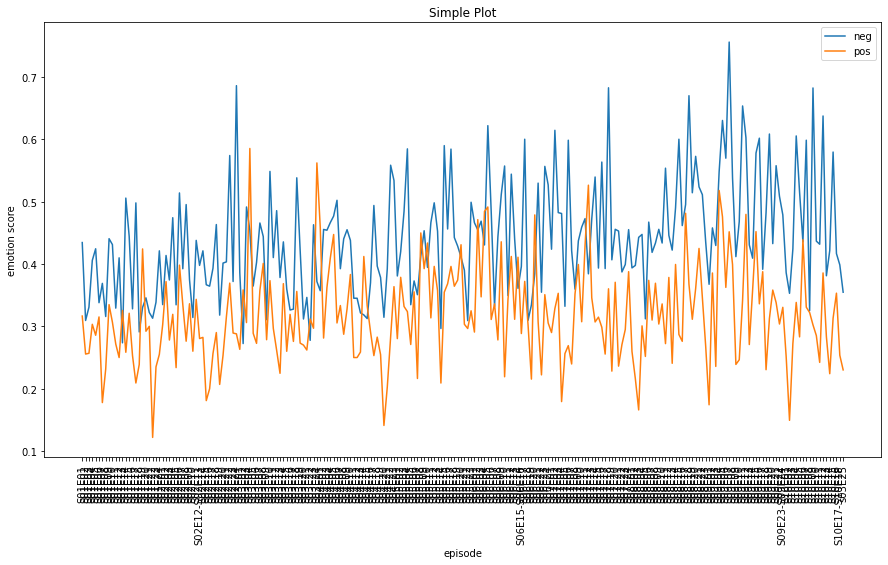

In [16]:
import matplotlib.pyplot as plt
# plt.plot(test["negative"])

plt.figure(figsize=(15, 8))
plt.plot(test['positive'], label='neg')
plt.plot(test['negative'], label='pos')
plt.xlabel('episode')
plt.ylabel('emotion score')
plt.xticks(rotation=90)
plt.title("Simple Plot")
plt.legend();


plt.show()

In [17]:
season_finale = friends.groupby('season').last()
sfinales = season_finale['id'].tolist()
print(sfinales)

['S01E24', 'S02E24', 'S03E24', 'S04E23', 'S05E23', 'S06E24', 'S07E24', 'S08E23', 'S09E23-S09E24', 'S10E17-S10E18', 's03E25']


In [21]:
sfins = test.loc[sfinales]
rest = test.drop(sfinales)

<AxesSubplot:>

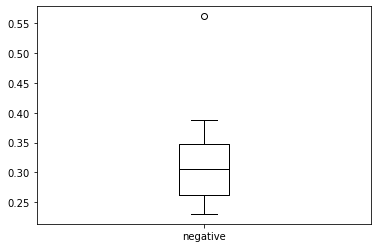

In [28]:
sfins.boxplot(column=['negative'], grid=False, color='black')


<AxesSubplot:>

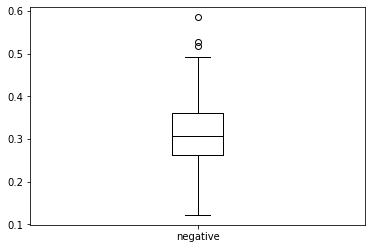

In [29]:

rest.boxplot(column=['negative'], grid=False, color='black')

<AxesSubplot:>

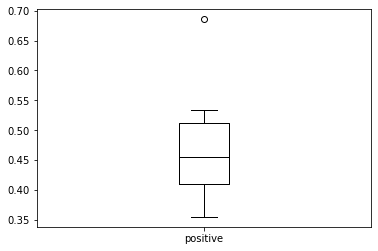

In [30]:
sfins.boxplot(column=['positive'], grid=False, color='black')

<AxesSubplot:>

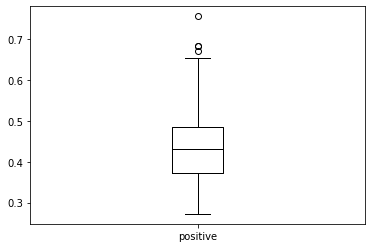

In [31]:
rest.boxplot(column=['positive'], grid=False, color='black')